#Importing Libraries

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Loading Train data

In [388]:
df=pd.read_csv('train.csv')


In [389]:
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [390]:
df.shape #to know rows and columns

(6399, 30)

In [391]:
df.columns #column names

Index(['id', 'car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price',
       'city', 'times_viewed', 'body_type', 'transmission', 'variant',
       'assured_buy', 'registered_city', 'registered_state', 'is_hot', 'rto',
       'source', 'make', 'model', 'car_availability', 'total_owners',
       'broker_quote', 'original_price', 'car_rating', 'ad_created_on',
       'fitness_certificate', 'emi_starts_from', 'booking_down_pymnt',
       'reserved', 'warranty_avail'],
      dtype='object')

**value count**

In [392]:
df['car_name'].value_counts()

maruti swift                478
maruti swift dzire          332
hyundai i10                 330
maruti wagon r 1.0          292
hyundai grand i10           246
                           ... 
tata manza                    1
mahindra verito               1
datsun go                     1
hyundai sonata transform      1
tata indigo ecs               1
Name: car_name, Length: 182, dtype: int64

In [393]:
df['city'].value_counts()

mumbai       1144
bengaluru    1069
new delhi     986
pune          670
chennai       627
hyderabad     549
ahmedabad     354
gurgaon       313
noida         277
ghaziabad     194
faridabad     102
lucknow        91
kolkata        23
Name: city, dtype: int64

In [394]:
df['sale_price'].value_counts()

300000    20
350000    14
250000    14
150000    13
400000    12
          ..
396199     1
779199     1
489199     1
401999     1
711999     1
Name: sale_price, Length: 4118, dtype: int64

In [395]:
df.info() #info about each column how many nullvalues and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6399 non-null   int64  
 1   car_name             6399 non-null   object 
 2   yr_mfr               6399 non-null   int64  
 3   fuel_type            6399 non-null   object 
 4   kms_run              6399 non-null   int64  
 5   sale_price           6399 non-null   int64  
 6   city                 6399 non-null   object 
 7   times_viewed         6399 non-null   int64  
 8   body_type            6309 non-null   object 
 9   transmission         5925 non-null   object 
 10  variant              6399 non-null   object 
 11  assured_buy          6399 non-null   bool   
 12  registered_city      6391 non-null   object 
 13  registered_state     6391 non-null   object 
 14  is_hot               6399 non-null   bool   
 15  rto                  6399 non-null   o

In [396]:
df.nunique(axis=0) #no of unique values in each column

id                     6399
car_name                182
yr_mfr                   24
fuel_type                 5
kms_run                6243
sale_price             4118
city                     13
times_viewed           2954
body_type                 5
transmission              2
variant                 873
assured_buy               2
registered_city         230
registered_state         16
is_hot                    2
rto                     255
source                    3
make                     26
model                   182
car_availability          4
total_owners              6
broker_quote           5693
original_price         3476
car_rating                4
ad_created_on          6398
fitness_certificate       2
emi_starts_from        4048
booking_down_pymnt     4048
reserved                  2
warranty_avail            2
dtype: int64

In [397]:
df.duplicated().sum() #no duplicate values

0

**No duplicate records**

In [398]:
df.isnull().sum() #checking for null values

id                        0
car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type                90
transmission            474
variant                   0
assured_buy               0
registered_city           8
registered_state          8
is_hot                    0
rto                       0
source                  114
make                      0
model                     0
car_availability        542
total_owners              0
broker_quote              0
original_price         2824
car_rating                7
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

**Here original_price column contains more null values so we can after correaltion analysis wether remove or not**

In [399]:
corr=df.corr() #to find correlation
corr

,id,yr_mfr,kms_run,sale_price,times_viewed,assured_buy,is_hot,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
id,1.000000,0.089709,0.015080,0.032071,0.009603,0.023037,-0.080135,-0.009446,0.008309,-0.000049,0.032071,0.032071,0.004702,0.014275
yr_mfr,0.089709,1.000000,-0.396612,0.521379,0.067565,0.119977,0.204486,-0.295556,0.542951,0.502866,0.521379,0.521379,0.100374,-0.003712
kms_run,0.015080,-0.396612,1.000000,-0.098388,-0.115663,-0.015230,-0.118013,0.136007,-0.121848,-0.082849,-0.098389,-0.098388,-0.081682,0.016345
sale_price,0.032071,0.521379,-0.098388,1.000000,0.098256,0.032198,0.065627,-0.127794,0.961021,0.986196,1.000000,1.000000,0.054197,-0.013129
times_viewed,0.009603,0.067565,-0.115663,0.098256,1.000000,0.079840,0.184748,0.002830,0.131855,0.092438,0.098256,0.098256,0.223501,-0.047353
assured_buy,0.023037,0.119977,-0.015230,0.032198,0.079840,1.000000,0.380024,-0.073470,0.078595,0.009191,0.032197,0.032198,0.071509,-0.027761
is_hot,-0.080135,0.204486,-0.118013,0.065627,0.184748,0.380024,1.000000,-0.125427,0.184548,0.010380,0.065626,0.065628,0.147890,-0.348627
total_owners,-0.009446,-0.295556,0.136007,-0.127794,0.002830,-0.073470,-0.125427,1.000000,-0.150618,-0.080680,-0.127793,-0.127794,-0.056257,0.011473
broker_quote,0.008309,0.542951,-0.121848,0.961021,0.131855,0.078595,0.184548,-0.150618,1.000000,0.985439,0.961020,0.961021,0.085843,-0.061038
original_price,-0.000049,0.502866,-0.082849,0.986196,0.092438,0.009191,0.010380,-0.080680,0.985439,1.000000,0.986196,0.986196,0.080518,-0.004814


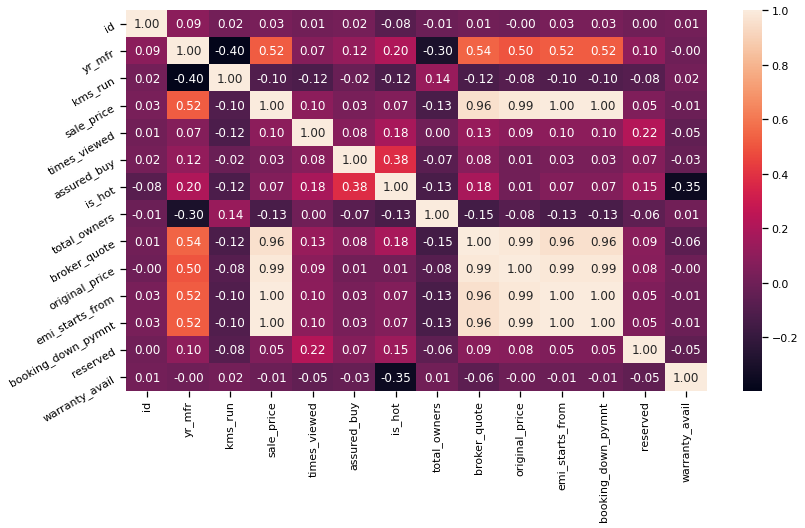

In [400]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#We can observe from above that sale_price,emi_starts_from,booking_down_pymnt
#original_price ,broker_quote are highly correlated and 
#sale_price is our target variable
#That means emi_starts_from , booking_down_payment,original_price,broker_qoute effect more our target variable

#So we can keep any one of them and frop remaining columns

#Here i am removing above mentioned columns and keeping booking_down_payment as it is
#I am removing original_price also because as we observed above it has 2824 null values

#And also removing Id column because it doesn't effect our target column

In [401]:
def remove(df):
  df1=df.drop(['id','emi_starts_from','original_price','broker_quote'],axis=1)
  return df1
df1=remove(df)

In [402]:
df1

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,toyota fortuner,2012,diesel,116838,1100000,lucknow,327,luxury suv,manual,3.0 mt 4x2,True,pratapgarh,uttar pradesh,False,up72,online,toyota,fortuner,NaN,2,good,2019-09-06T04:20:28.916,False,165000,False,True
6395,hyundai i20,2012,diesel,47317,370000,lucknow,214,hatchback,manual,sportz 1.4 crdi 6 speed bs iv,False,gurgaon,haryana,False,hr26,online,hyundai,i20,NaN,1,overpriced,2019-09-02T09:43:11.541,False,55500,False,True
6396,toyota innova,2009,diesel,274167,415000,lucknow,247,suv,manual,2.5 g4 7 str,True,lucknow,uttar pradesh,False,up32,online,toyota,innova,NaN,2,overpriced,2019-08-28T14:42:16.246,False,62250,False,False
6397,tata indica ev2,2011,diesel,119634,150000,lucknow,157,hatchback,manual,lx,False,lucknow,uttar pradesh,False,up32,online,tata,indica ev2,NaN,2,overpriced,2019-08-26T06:10:57.269,False,22500,False,False


In [403]:
df1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False


In [404]:
df1.isnull().sum()

car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               90
transmission           474
variant                  0
assured_buy              0
registered_city          8
registered_state         8
is_hot                   0
rto                      0
source                 114
make                     0
model                    0
car_availability       542
total_owners             0
car_rating               7
ad_created_on            1
fitness_certificate      8
booking_down_pymnt       0
reserved                 0
warranty_avail           0
dtype: int64

In [405]:
df1.shape

(6399, 26)

In [406]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             6399 non-null   object
 1   yr_mfr               6399 non-null   int64 
 2   fuel_type            6399 non-null   object
 3   kms_run              6399 non-null   int64 
 4   sale_price           6399 non-null   int64 
 5   city                 6399 non-null   object
 6   times_viewed         6399 non-null   int64 
 7   body_type            6309 non-null   object
 8   transmission         5925 non-null   object
 9   variant              6399 non-null   object
 10  assured_buy          6399 non-null   bool  
 11  registered_city      6391 non-null   object
 12  registered_state     6391 non-null   object
 13  is_hot               6399 non-null   bool  
 14  rto                  6399 non-null   object
 15  source               6285 non-null   object
 16  make  

#Handling missing values

**In our data body_type,transmission,source,car_availability,car_rating,ad_created_on,fitness_certificate,registered_city,registered_state contains null values our next step is to handle missing data**

In [407]:
df1.dtypes

car_name               object
yr_mfr                  int64
fuel_type              object
kms_run                 int64
sale_price              int64
city                   object
times_viewed            int64
body_type              object
transmission           object
variant                object
assured_buy              bool
registered_city        object
registered_state       object
is_hot                   bool
rto                    object
source                 object
make                   object
model                  object
car_availability       object
total_owners            int64
car_rating             object
ad_created_on          object
fitness_certificate    object
booking_down_pymnt      int64
reserved                 bool
warranty_avail           bool
dtype: object

In [408]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print("_____________________________________________________________________")
  #printing unique values of each column

id
[   1    2    3 ... 6397 6398 6399]
_____________________________________________________________________
car_name
['maruti swift' 'maruti alto 800' 'hyundai grand i10' 'maruti alto k10'
 'maruti ritz' 'hyundai i20' 'hyundai elite i20' 'renault kwid'
 'hyundai i10' 'honda brio' 'honda city' 'hyundai eon' 'hyundai verna'
 'maruti alto' 'hyundai santro xing' 'maruti swift dzire' 'ford ecosport'
 'nissan sunny' 'hyundai xcent' 'toyota etios liva' 'maruti celerio'
 'maruti baleno' 'hyundai new elantra' 'honda amaze' 'hyundai creta'
 'maruti wagon r 1.0' 'audi q3' 'maruti vitara brezza'
 'toyota corolla altis' 'toyota innova' 'renault scala' 'maruti dzire'
 'renault duster' 'tata tiago' 'maruti ertiga' 'datsun redi go'
 'honda wr-v' 'mahindra xuv500' 'maruti sx4' 'volkswagen polo'
 'maruti zen estilo' 'mahindra scorpio' 'toyota innova crysta' 'ford figo'
 'mitsubishi outlander' 'volkswagen ameo' 'nissan terrano' 'toyota etios'
 'volkswagen vento' 'audi a6' 'toyota fortuner' 'mahindra tuv

#Here i am replacing object type column missing values with their mode and numeric type columns with their mean

In [409]:
cateogry_columns=df1.select_dtypes(include=['object']).columns.tolist()
integer_columns=df1.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df1:
    if df1[column].isnull().any():
        if(column in cateogry_columns):
            df1[column]=df1[column].fillna(df1[column].mode()[0])
        else:
            df1[column]=df1[column].fillna(df1[column].mean)

In [410]:
df1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False


In [411]:
df1.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
car_rating             0
ad_created_on          0
fitness_certificate    0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64

In [412]:
df1.describe() #gives statistical description about our numerical data

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,booking_down_pymnt
count,6399.000000,6399.000000,6.399000e+03,6399.000000,6399.000000,6399.000000
mean,2013.895921,62382.210970,4.546049e+05,1534.860916,1.325988,68190.888576
std,3.088329,43087.788245,2.779465e+05,1965.452173,0.574816,41692.006252
min,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000
25%,2012.000000,31555.000000,2.822990e+05,554.000000,1.000000,42345.000000
50%,2014.000000,55490.000000,3.820990e+05,1080.000000,1.000000,57315.000000
75%,2016.000000,84145.000000,5.400000e+05,1912.000000,2.000000,81000.000000
max,2021.000000,996609.000000,3.600000e+06,46141.000000,6.000000,540000.000000


In [413]:
df1.describe(include='object') #description about categorical data

,car_name,fuel_type,city,body_type,transmission,variant,registered_city,registered_state,rto,source,make,model,car_availability,car_rating,ad_created_on
count,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399
unique,182,5,13,5,2,873,230,16,255,3,26,182,4,4,6398
top,maruti swift,petrol,mumbai,hatchback,manual,vxi,delhi,maharashtra,mh12,inperson_sale,maruti,swift,in_stock,great,2019-02-20T14:13:30.464
freq,478,4001,1144,3888,5855,573,840,1820,331,6018,2756,478,6146,5454,2


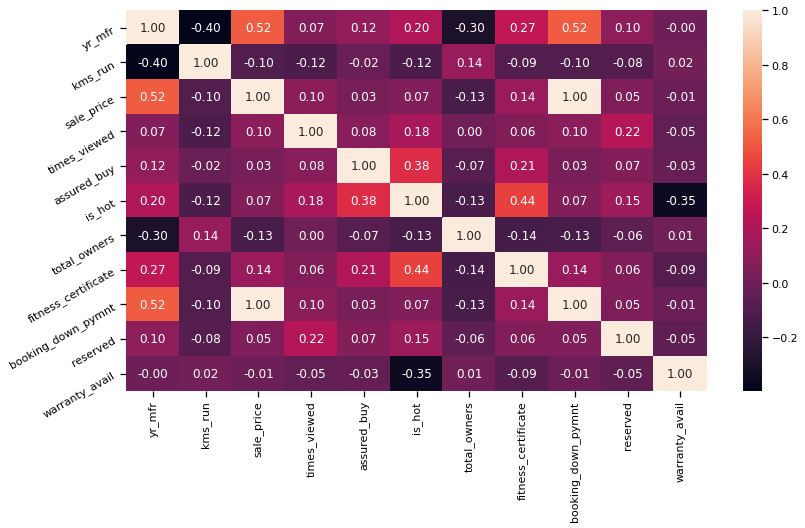

In [414]:
#finding correlation again
corr = df1.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#Handling Outliers

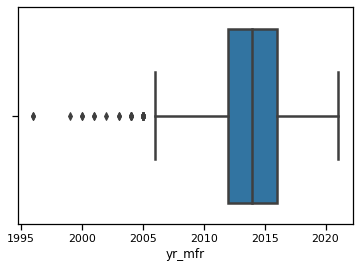

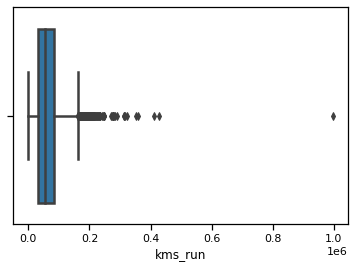

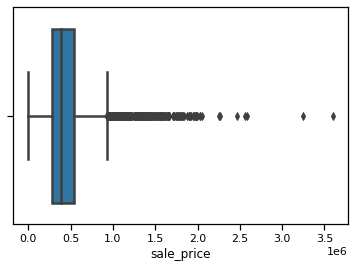

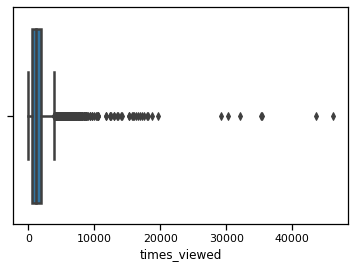

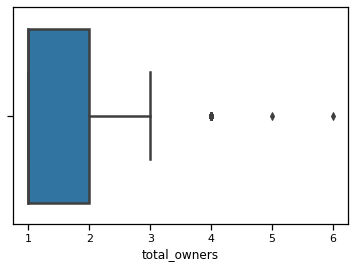

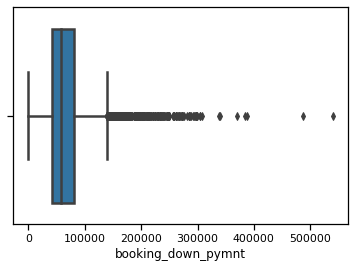

In [415]:
for i in integer_columns:
  plt.figure()
  sns.boxplot(x=df1[i])

#We can observe from above boox plots we have to handle outliers in kms_run sale_price and times_viewed column 
#As sales_price and booking_down_pymnet are highly correlated handling one column will reflect on another

**Taking kms_run upto max value**

In [416]:
max_km=df1['kms_run'].max()
max_km

996609

In [417]:
df1=df1[df1['kms_run']<max_km]
df1.shape

(6398, 26)

**From boxplot observations we can take sales_price < 3000000 only**

In [429]:
df1=df1[df1['sale_price']<3000000]
df1.shape

(6390, 26)

**From boxplot observations we can take times_viewed < 30000 only**

In [418]:
df1=df1[df1['times_viewed']<30000]
df1.shape

(6392, 26)

In [432]:
data=df1['booking_down_pymnt'].max()
data

387885

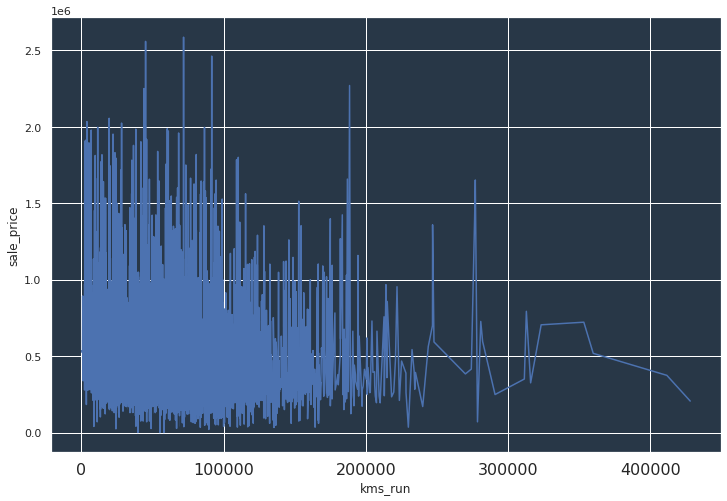

In [433]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='kms_run',y='sale_price',data=df1)

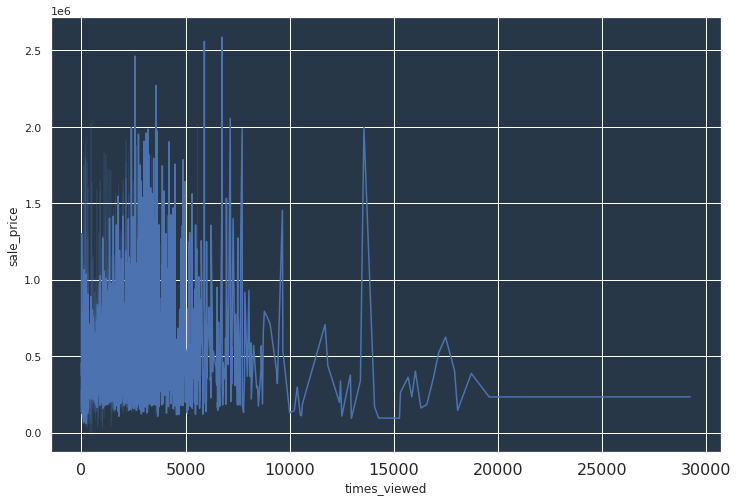

In [434]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='times_viewed',y='sale_price',data=df1)



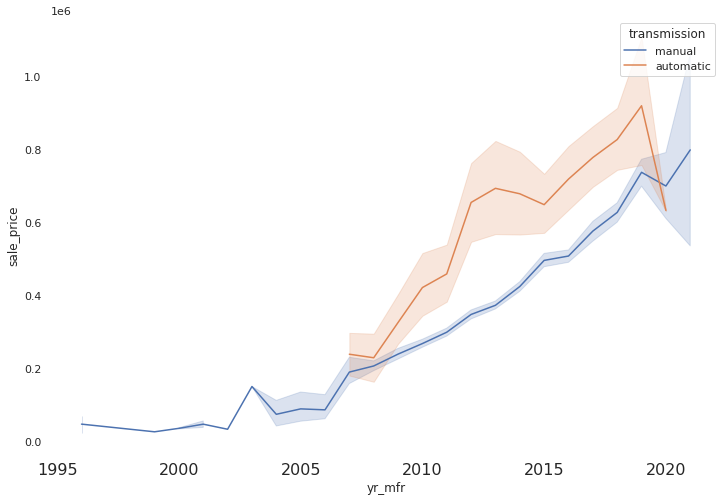

In [437]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'white','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='yr_mfr',y='sale_price',data=df1,hue='transmission')

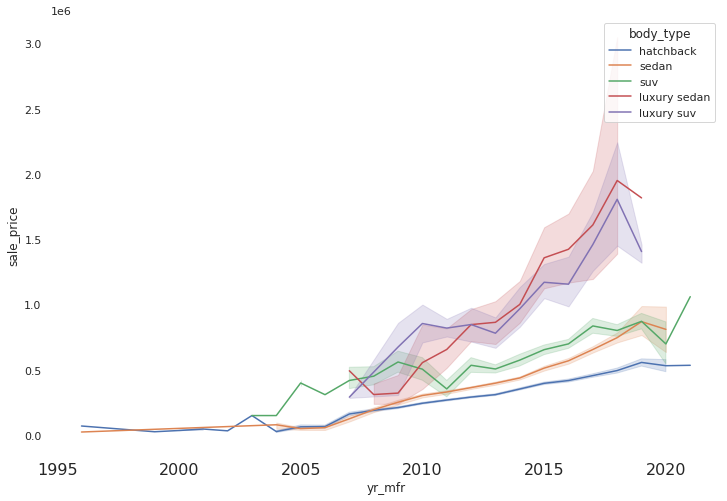

In [445]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'white','axes.grid': False,'xtick.labelsize':16})
sns.lineplot(x='yr_mfr',y='sale_price',data=df,hue='body_type')

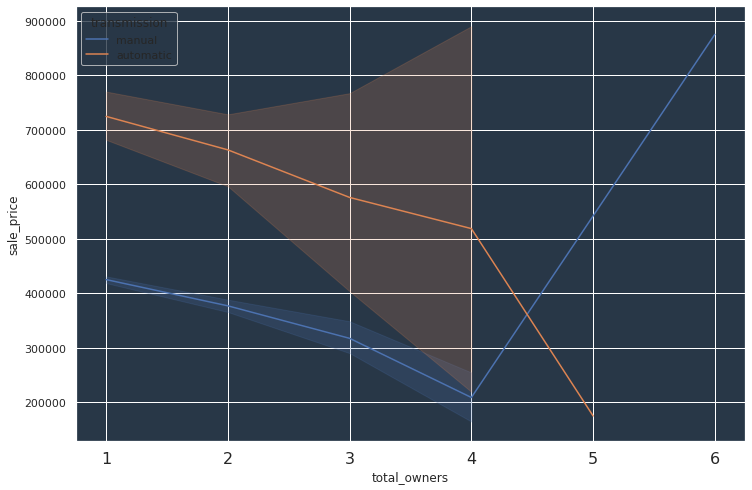

In [446]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='total_owners',y='sale_price',data=df,hue='transmission')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


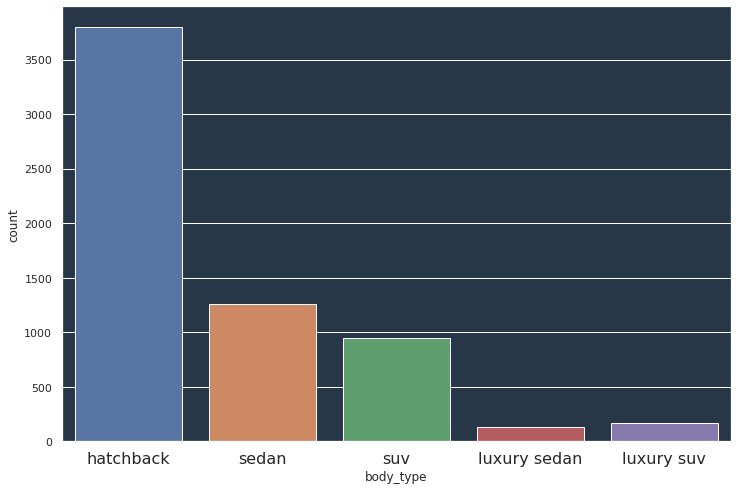

In [447]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.countplot(df['body_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


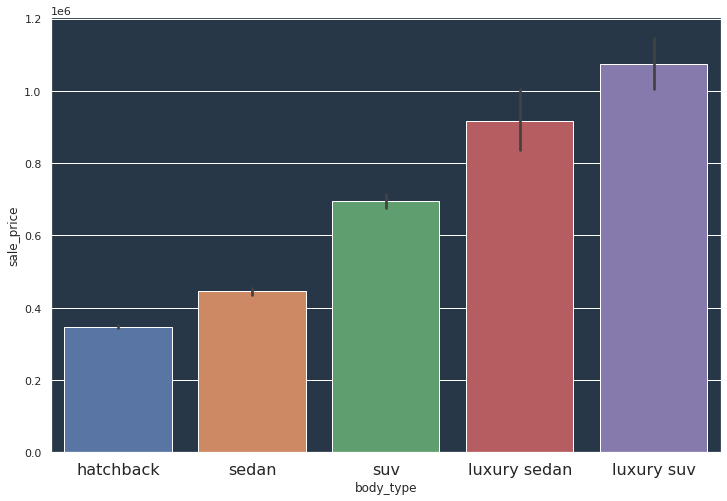

In [448]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['body_type'],df['sale_price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


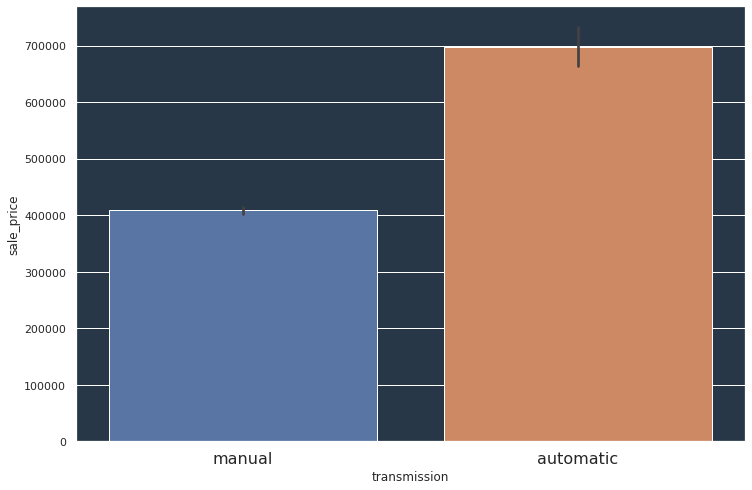

In [449]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['transmission'],df['sale_price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

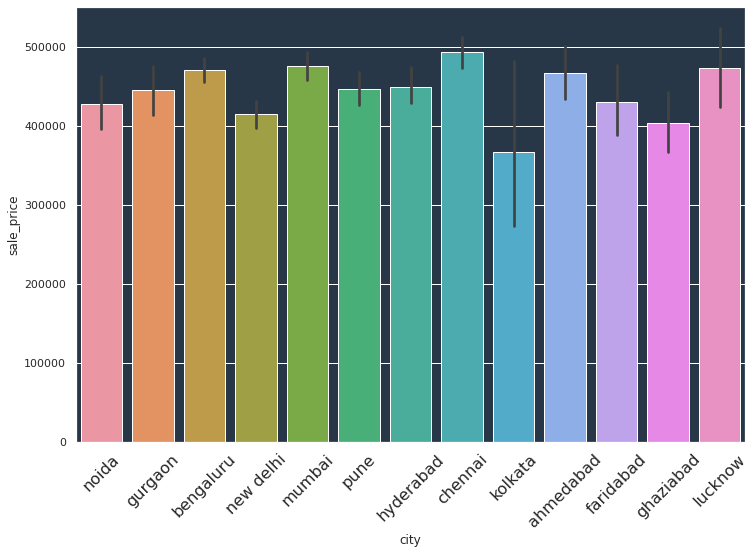

In [450]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['city'],df['sale_price'])
plt.xticks(rotation=45)

In [ ]:
sns.pairplot(df1,kind='kde')

#Loading Test Data

In [419]:
df_test=pd.read_csv('test.csv')

In [420]:
df_test.shape

(1000, 30)

In [421]:
df_test.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,vxi 1.2 bs iv,True,pune,maharashtra,True,mh12,inperson_sale,maruti,swift dzire,in_stock,3,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False
1,2,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,era plus,True,delhi,delhi,True,dl7c,inperson_sale,hyundai,eon,in_stock,1,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False
2,3,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,1.5 smt i dtec,True,mumbai,maharashtra,True,mh02,inperson_sale,honda,amaze,in_stock,1,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False
3,4,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,magna o 1.2,True,bengaluru,karnataka,True,ka53,inperson_sale,hyundai,i20,in_transit,3,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False
4,5,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,1.6 crdi sx plus auto,True,lucknow,uttar pradesh,True,up32,inperson_sale,hyundai,creta,in_stock,1,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False


In [422]:
df_test.isnull().sum()

id                       0
car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               13
transmission            82
variant                  0
assured_buy              0
registered_city          2
registered_state         2
is_hot                   0
rto                      0
source                  12
make                     0
model                    0
car_availability        78
total_owners             0
broker_quote             0
original_price         455
car_rating               2
ad_created_on            0
fitness_certificate      0
emi_starts_from          0
booking_down_pymnt       0
reserved                 0
warranty_avail           0
dtype: int64

#We removed some columns in train data so we have to remove them in test data also

In [423]:
df_test1=remove(df_test)

In [424]:
df_test1.shape

(1000, 26)

In [425]:
df_test1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,vxi 1.2 bs iv,True,pune,maharashtra,True,mh12,inperson_sale,maruti,swift dzire,in_stock,3,great,2021-03-16T05:00:49.555,True,54645,False,False
1,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,era plus,True,delhi,delhi,True,dl7c,inperson_sale,hyundai,eon,in_stock,1,great,2021-03-10T12:08:11.905,True,32520,False,False
2,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,1.5 smt i dtec,True,mumbai,maharashtra,True,mh02,inperson_sale,honda,amaze,in_stock,1,great,2021-03-15T12:03:30.041,True,58110,True,False
3,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,magna o 1.2,True,bengaluru,karnataka,True,ka53,inperson_sale,hyundai,i20,in_transit,3,great,2021-04-09T11:16:26.157,True,54705,True,False
4,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,1.6 crdi sx plus auto,True,lucknow,uttar pradesh,True,up32,inperson_sale,hyundai,creta,in_stock,1,great,2021-04-01T07:24:31.712,True,162302,False,False


#Handling null values in test data

In [426]:
cateogry_columns=df_test1.select_dtypes(include=['object']).columns.tolist()
integer_columns=df_test1.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test1:
    if df_test1[column].isnull().any():
        if(column in cateogry_columns):
            df_test1[column]=df_test1[column].fillna(df_test1[column].mode()[0])
        else:
            df_test1[column]=df_test1[column].fillna(df_test1[column].mean)

In [427]:
df_test1.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
car_rating             0
ad_created_on          0
fitness_certificate    0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64